In [8]:
import urllib.request
import tarfile

# URL of the dataset
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
filename = "cifar-10-python.tar.gz"

# Download the dataset
urllib.request.urlretrieve(url, filename)

# Extract the tar.gz file
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()  # Extracts to current directory

/var/folders/v2/w7vjsgyj1kqdp4fm9gjnszx00000gn/T/ipykernel_77950/2015753856.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()  # Extracts to current directory


In [1]:
import pickle

# Function to load a CIFAR-10 batch
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        data_dict = pickle.load(file, encoding='bytes')
    return data_dict

# Load the first batch
data_batch_1 = load_cifar10_batch('cifar-10-batches-py/data_batch_1')

# Inspect the keys in the loaded batch
print(data_batch_1.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


# Data batch format

data_batch_1 will have 4 colummn

- batch_label: b'training batch 1 of 5'
- labels: 10000 elements array of numbers from 0 to 9 representing a label (batches.meta.txt)
- data: 10000x3072 np array of uint8
- filenames: 10000 elements array of the filenames of each sample

Loaded in this way, each of the batch files contains a dictionary with the following elements:
- data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
- labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.


In [2]:
def reshape(data):
    return data.reshape(3, 32, 32).transpose(1, 2, 0)

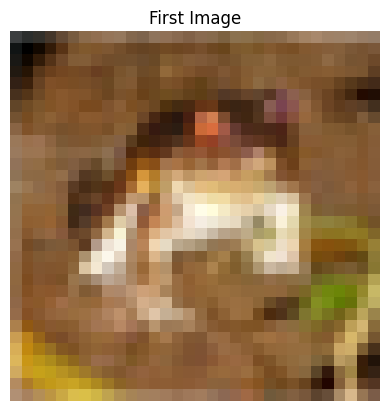

In [3]:
import matplotlib.pyplot as plt

# Reshape the first image data to 32x32x3
first_image = reshape(data_batch_1[b"data"][0])

# Display the image
plt.imshow(first_image)
plt.title("First Image")
plt.axis("off")
plt.show()

In [ ]:
import diffusers
import torch
from diffusers.models.attention_processor import AttnProcessor2_0
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = diffusers.MarigoldDepthPipeline.from_pretrained(
    "prs-eth/marigold-depth-v1-1", variant="fp16",
).to(device)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
depth_est = pipe(first_image, num_inference_steps=5)

Marigold predictions...:   0%|          | 0/1 [00:00<?, ?it/s]

Diffusion steps...:   0%|          | 0/5 [00:00<?, ?it/s]

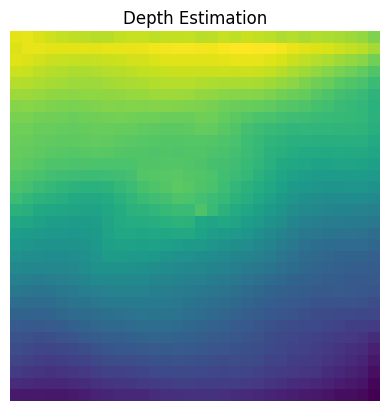

In [6]:
plt.imshow(depth_est.prediction[0])
plt.title("Depth Estimation")
plt.axis("off")
plt.show()